#**Predicting  Covid19 Deaths Using Deep Learning Models**

**Collaborators**: Sebastian Tardieu, Shane Fabbri,  Binod Rimal

# **Part I:  Data Creation and Exploration**

In [ ]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns
# sns.set_theme(style="whitegrid")
#plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir= "/content/drive/MyDrive/Covid_19"

In [ ]:
#file = "covid_19_data.csv"
file='owid-covid-data.csv'
file = os.path.join(data_dir, file)
df = pd.read_csv(file,index_col=[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358750 entries, AFG to ZWE
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   341666 non-null  object 
 1   location                                    358750 non-null  object 
 2   date                                        358750 non-null  object 
 3   total_cases                                 320628 non-null  float64
 4   new_cases                                   349032 non-null  float64
 5   new_cases_smoothed                          347773 non-null  float64
 6   total_deaths                                299086 non-null  float64
 7   new_deaths                                  349089 non-null  float64
 8   new_deaths_smoothed                         347859 non-null  float64
 9   total_cases_per_million                     320628 non-null  float64
 10  ne

In [ ]:
#selected_var=['date','new_deaths','new_cases',  'icu_patients', 'hosp_patients','positive_rate','total_vaccinations']
selected_var=['date','new_deaths_smoothed','new_cases_smoothed',  'icu_patients', 'hosp_patients','positive_rate','total_vaccinations']
df2=df[selected_var]

In [ ]:
df2.isna().sum()

date                        0
new_deaths_smoothed     10891
new_cases_smoothed      10977
icu_patients           320916
hosp_patients          319523
positive_rate          262823
total_vaccinations     278638
dtype: int64

In [ ]:
df2=df2.fillna(method='ffill')

In [ ]:
df2.isna().sum()

date                       0
new_deaths_smoothed        5
new_cases_smoothed         5
icu_patients            4456
hosp_patients          18564
positive_rate            764
total_vaccinations       416
dtype: int64

In [ ]:
df2=df2.fillna(method='bfill')

In [ ]:
df2.isna().sum()

date                   0
new_deaths_smoothed    0
new_cases_smoothed     0
icu_patients           0
hosp_patients          0
positive_rate          0
total_vaccinations     0
dtype: int64

In [ ]:
df2.head()

,date,new_deaths_smoothed,new_cases_smoothed,icu_patients,hosp_patients,positive_rate,total_vaccinations
iso_code,,,,,,,
AFG,2020-01-03,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-04,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-05,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-06,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-07,0.0,0.0,62.0,426.0,0.4855,0.0


In [ ]:
df2['date']=pd.to_datetime(df2['date'])
df2.head()

,date,new_deaths_smoothed,new_cases_smoothed,icu_patients,hosp_patients,positive_rate,total_vaccinations
iso_code,,,,,,,
AFG,2020-01-03,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-04,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-05,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-06,0.0,0.0,62.0,426.0,0.4855,0.0
AFG,2020-01-07,0.0,0.0,62.0,426.0,0.4855,0.0


In [ ]:
data = df2.groupby('date')['new_deaths_smoothed', 'new_cases_smoothed', 'icu_patients', 'hosp_patients',  'total_vaccinations'].sum()
data.tail()

,new_deaths_smoothed,new_cases_smoothed,icu_patients,hosp_patients,total_vaccinations
date,,,,,
2023-11-23,62.427,10671.858,3511.0,73550.0,4.328761e+10
2023-11-24,62.427,10671.858,3415.0,60207.0,4.277682e+10
2023-11-25,62.427,10671.858,3389.0,59568.0,4.273701e+10
2023-11-26,61.856,10374.715,3387.0,59580.0,4.273242e+10
2023-11-27,61.856,10374.715,2835.0,45505.0,4.167368e+10


In [ ]:
data['positive_rate'] = df2.groupby('date')['positive_rate'].mean()

data.head(50)

,new_deaths_smoothed,new_cases_smoothed,icu_patients,hosp_patients,total_vaccinations,positive_rate
date,,,,,,
2020-01-01,0.000,0.000,2.0,618.0,2.752524e+06,0.002750
2020-01-02,0.000,0.000,2.0,618.0,2.752524e+06,0.002750
2020-01-03,376.284,30210.715,27784.0,703779.0,5.750226e+10,0.153715
2020-01-04,376.284,30210.715,27784.0,703779.0,5.750226e+10,0.153715
2020-01-05,376.284,30210.715,27784.0,703779.0,5.750226e+10,0.153715
2020-01-06,376.284,30210.715,27784.0,701277.0,5.750226e+10,0.153715
2020-01-07,376.284,30210.715,27784.0,701277.0,5.750226e+10,0.154376
2020-01-08,2.145,4.143,27784.0,701277.0,5.750226e+10,0.154359
2020-01-09,2.145,4.286,27784.0,701277.0,5.750226e+10,0.154262


In [ ]:
data=data['2020-01-22':'2022-12-31']
data.head()

,new_deaths_smoothed,new_cases_smoothed,icu_patients,hosp_patients,total_vaccinations,positive_rate
date,,,,,,
2020-01-22,9.144,232.286,27796.0,701659.0,5.750735e+10,0.153990
2020-01-23,9.716,308.286,27796.0,701659.0,5.750735e+10,0.154006
2020-01-24,13.716,460.858,27796.0,701659.0,5.750735e+10,0.154006
2020-01-25,22.856,728.859,27796.0,701659.0,5.750735e+10,0.154006
2020-01-26,32.429,1086.998,27796.0,701659.0,5.750735e+10,0.154067


In [ ]:
#data=df.set_index('ObservationDate')
data.index = pd.to_datetime(data.index)
data.index.name = None

data.head()

,new_deaths_smoothed,new_cases_smoothed,icu_patients,hosp_patients,total_vaccinations,positive_rate
2020-01-22,9.144,232.286,27796.0,701659.0,5.750735e+10,0.153990
2020-01-23,9.716,308.286,27796.0,701659.0,5.750735e+10,0.154006
2020-01-24,13.716,460.858,27796.0,701659.0,5.750735e+10,0.154006
2020-01-25,22.856,728.859,27796.0,701659.0,5.750735e+10,0.154006
2020-01-26,32.429,1086.998,27796.0,701659.0,5.750735e+10,0.154067


In [ ]:
data.shape

(1075, 6)

In [ ]:
columns=['new_deaths', 'new_cases', 'icu_patients', 'hosp_patients',  'total_vaccinations', 'positive_rate']
data.columns=columns
data.head()

,new_deaths,new_cases,icu_patients,hosp_patients,total_vaccinations,positive_rate
2020-01-22,9.144,232.286,27796.0,701659.0,5.750735e+10,0.153990
2020-01-23,9.716,308.286,27796.0,701659.0,5.750735e+10,0.154006
2020-01-24,13.716,460.858,27796.0,701659.0,5.750735e+10,0.154006
2020-01-25,22.856,728.859,27796.0,701659.0,5.750735e+10,0.154006
2020-01-26,32.429,1086.998,27796.0,701659.0,5.750735e+10,0.154067


In [ ]:
output_dir_path = "/content/drive/MyDrive/Covid_19/Results/"

## **Visualization of Response Variable**

<Figure size 1500x400 with 0 Axes>

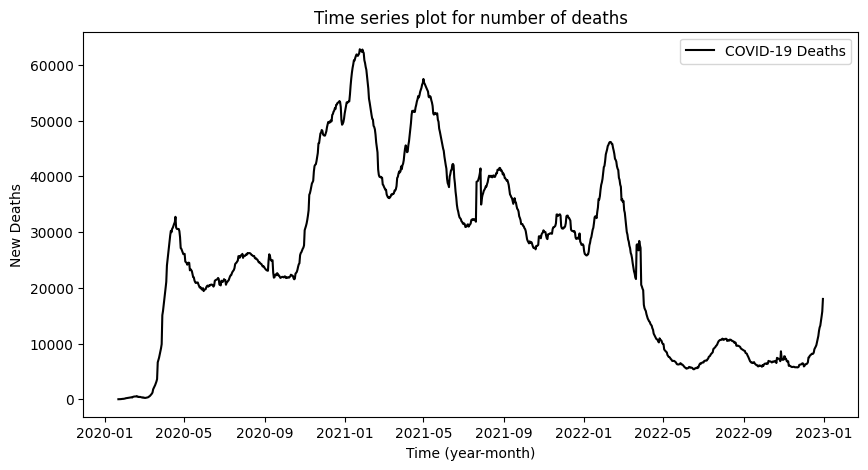

In [ ]:
fig = plt.figure(figsize = (15,4))


fig = plt.figure(figsize=(10,5))
#fig.set(facecolor = "white")
plt.plot(data['new_deaths'],'k', label='COVID-19 Deaths')
plt.legend(['COVID-19 Deaths'], loc='upper right')
plt.title('Time series plot for number of deaths')
plt.xlabel('Time (year-month)')
plt.ylabel('New Deaths')
fig.savefig(output_dir_path+'original_data_plot.png',dpi=600)
plt.show()

####  **Correlation heatmap**

In [ ]:
# Create a lower triangular mask
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

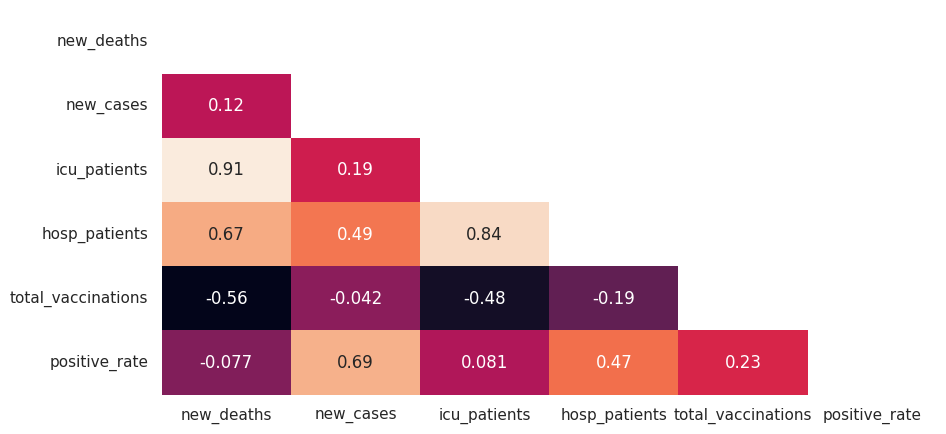

In [ ]:
#data = nepse_data.iloc[:, 4:]
sns.set_style("white")  # Set the style to plain white background
sns.set(style="white", rc={"axes.grid": False})
fig = plt.figure(figsize= (10,5))
sns.heatmap(data.corr(), annot=True, mask=mask, cbar = False)
plt.show()

<Figure size 2000x1200 with 0 Axes>

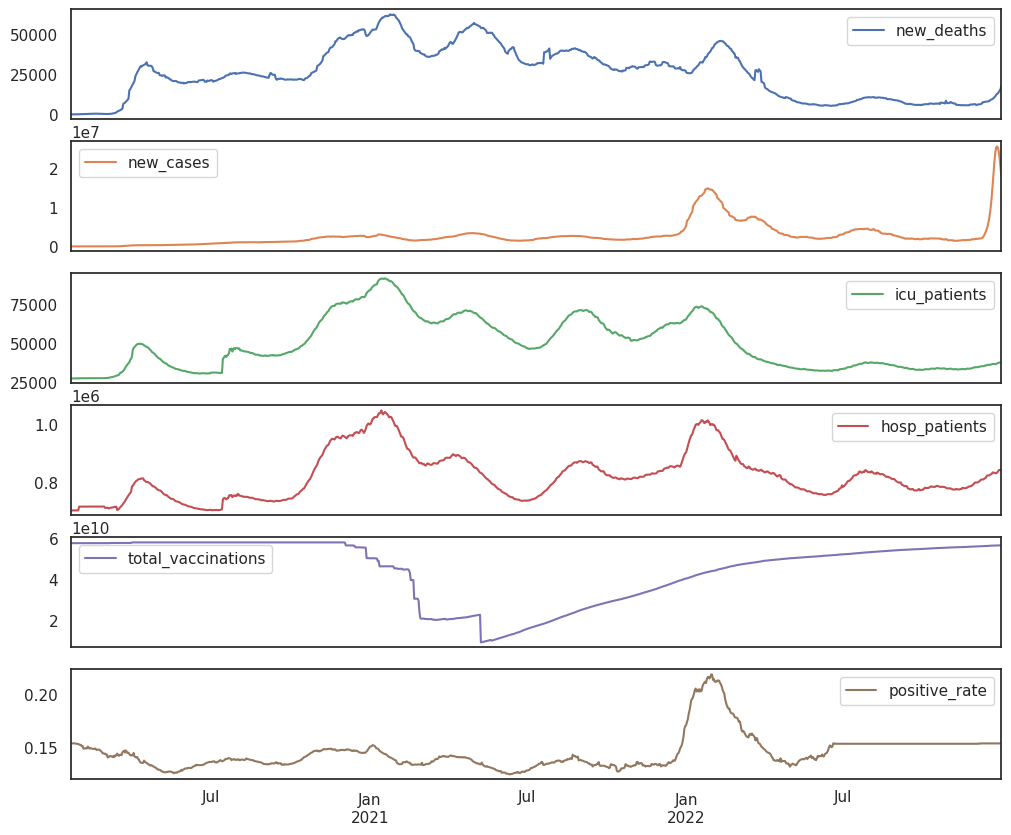

In [ ]:
fig = plt.figure(figsize = (20, 12))
#fig.axes.get_yaxis().set_visible(False)
data.plot(subplots = True, figsize = (12,10),grid=False)
sns.set_style("whitegrid")
fig.savefig(output_dir_path+"timeseries.png",dpi=600)
plt.show()

In [ ]:
data.describe()

,new_deaths,new_cases,icu_patients,hosp_patients,total_vaccinations,positive_rate
count,1075.000000,1.075000e+03,1075.000000,1.075000e+03,1.075000e+03,1075.000000
mean,26074.468087,2.837561e+06,49990.128372,8.198857e+05,4.501539e+10,0.145116
std,16185.721663,3.241578e+06,16540.309195,8.157766e+04,1.485772e+10,0.016264
min,9.144000,2.322860e+02,27796.000000,7.016590e+05,9.191042e+09,0.124980
25%,9697.146000,1.451314e+06,34863.500000,7.578905e+05,3.380068e+10,0.134804
50%,26055.719000,2.128732e+06,46711.000000,8.105800e+05,5.161593e+10,0.140962
75%,38309.361500,2.771227e+06,63738.500000,8.608305e+05,5.759321e+10,0.153660
max,62789.997000,2.572646e+07,91750.000000,1.049419e+06,5.787143e+10,0.218572


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1075 entries, 2020-01-22 to 2022-12-31
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_deaths          1075 non-null   float64
 1   new_cases           1075 non-null   float64
 2   icu_patients        1075 non-null   float64
 3   hosp_patients       1075 non-null   float64
 4   total_vaccinations  1075 non-null   float64
 5   positive_rate       1075 non-null   float64
dtypes: float64(6)
memory usage: 58.8 KB


### **Machine learning libraries**

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import math

### **Supporting functions**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred)/(y_true))*100)) #some issues with zero denominator

def calculate_scores(y_true, y_pred):
  rmse = math.sqrt(mean_squared_error(y_true, y_pred))
  #R2_score = r2_score(y_true, y_pred)
  R = np.corrcoef(y_true, y_pred)
  #mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  #dic = {'rmse':rmse, 'R2_score': R2_score, 'R':R[0,1], 'mae': mae, 'mape': mape}
  dic = {'rmse':rmse, 'R': R[0,1], 'mape': mape}
  return (dic)



def DatasetCreation(dataset, time_step = 1):  ##defining a function that gives a dataset and a time step, which then returns the input and output data
   DataX, DataY = [], []
   for i in range(len(dataset)- time_step -1):
         a = dataset[i:(i+ time_step), ]
         DataX.append(a)
         DataY.append(dataset[i + time_step, 0]) #ydata consists deaths
   return np.array(DataX), np.array(DataY)


def data_split(data, split = 0.2):
  #======= creating training and test data===#
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  data1  = data.iloc[0:l1,:]
  data2   = data.iloc[l1:len(data),:]
  return data1, data2

def min_max_transform(data, feature_range=(0, 1)):
   scaler = MinMaxScaler(feature_range)
   return scaler.fit_transform(data)

def min_max_inverse_transform(data_scaled, min_original, max_original):
    return min_original +  data_scaled*(max_original - min_original)



def write_dic_to_file(dic_name, file_name):
  file = open(file_name, 'w')
  file.write(str(dic_name))
  file.close()

import ast
def read_dic_from_file(file_name):
  file = open(file_name, "r")
  contents = file.read()
  dictionary = ast.literal_eval(contents)
  file.close()
  return dictionary



#**Building Deep Learning Models**

## **Model 1: Build and Compile LSTM Model**

In [ ]:
def Build_LSTM_Model(layers, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(layers)):
    if len(layers)==1:
      model.add(LSTM(np.int(layers[i]), input_shape = (time_step, num_features)))
    else:
      if i < len(layers)-1:
        if i == 0:
          model.add(LSTM(np.int(layers[i]), input_shape=(time_step, num_features), return_sequences= True))
          #model.add(Dropout(0.10))
        else:
          model.add(LSTM(np.int(layers[i]), return_sequences=True))
          #model.add(Dropout(0.10))
      else:
        model.add(LSTM(np.int(layers[i])))
        #model.add(Dropout(0.10))

  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation = 'linear'))

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

### **Testing**

In [ ]:
#optimizers_names = ['Adam', 'Adagrad', 'Nadam']
optimizers_names = ['Adam']
time_step = 5
num_features = 10
learning_rate = 0.001
verbose = 1
layers = [20]

Build_LSTM_Model(layers, time_step, num_features, optimizer =  optimizers_names[0], learning_rate= learning_rate, verbose = verbose)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2480      
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2833 (11.07 KB)
Trainable params: 2833 (11.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## **Model 2: Build and Compile GRU Model**

In [ ]:
def Build_GRU_Model(layers, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(layers)):
    if len(layers)==1:
      model.add(GRU(np.int(layers[i]), input_shape = (time_step, num_features)))
    else:
      if i < len(layers)-1:
        if i == 0:
          model.add(GRU(np.int(layers[i]), input_shape=(time_step, num_features), return_sequences= True))
          #model.add(Dropout(0.10))
        else:
          model.add(GRU(np.int(layers[i]), return_sequences=True))
          #model.add(Dropout(0.10))
      else:
        model.add(GRU(np.int(layers[i])))
        #model.add(Dropout(0.10))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(1, activation = 'linear'))

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

### **Testing**

In [ ]:
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
time_step = 5
num_features = 9
learning_rate = 0.001
verbose = 1
layers = [20]

Build_GRU_Model(layers, time_step, num_features, optimizer =  optimizers_names[0], learning_rate= learning_rate, verbose = verbose)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 20)                1860      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1881 (7.35 KB)
Trainable params: 1881 (7.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Tuning Hyperparameters of Deep Learning Models**

## **Model 1: Tuning Hyper Parameters of LSTM Model**

In [ ]:
def LSTM_Hyper_Parameter_Tuning(layers, data, time_step, split, optimizers_names, learning_rates, batch_sizes, epochs, num_replicates = 2):
  #======= creating training and test data===#
  train_data, val_data = data_split(data, split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["new_deaths"].min(), train_data["new_deaths"].max()
  min_val, max_val   =    val_data["new_deaths"].min(), val_data["new_deaths"].max()

  train_data_scaled  =  min_max_transform(train_data)
  val_data_scaled    = min_max_transform(val_data)

  X_train, y_train =   DatasetCreation(train_data_scaled, time_step)
  X_val, y_val     =   DatasetCreation(val_data_scaled, time_step)

  #========dealing with time series=========#

  best_avg_rmse = 99999999999

  collect_rmse = []

  all_avg_rmse = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))

  best_hyper_parameters = {"model": layers, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}

  #hist_csv_file = 'model_history'+ str(time.time())+'.csv'

  for opt in range(len(optimizers_names)):

    for lr in range(len(learning_rates)):

      for batch_size in range(len(batch_sizes)):

        for i in range(num_replicates):

          print("Running for " + optimizers_names[opt] + " optimizer " + str(learning_rates[lr]) +  " learning_rate " +  str(batch_sizes[batch_size]) + " batch_size and " + str(i) +  " replicate " +  "\n")

          model = Build_LSTM_Model(layers, time_step, num_features, optimizers_names[opt], learning_rate = learning_rates[lr], verbose = 0)

          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_size], epochs= epochs, validation_data = (X_val, y_val), callbacks=[callback], verbose = 1)

          #hist_df = pd.DataFrame(history.history)
          #hist_df.to_csv("history")
          #with open("hist_csv_file.csv", mode='w') as f:
          #  hist_df.to_csv(f)

          #==============Making predictions in original scale ==========
          #train_pred  =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train)
          val_pred    =  min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)

          #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
          #scores =   calculate_scores(min_max_inverse_transform(y_val, min_val, max_val),val_pred)

          collect_rmse.append(math.sqrt(mean_squared_error(min_max_inverse_transform(y_val, min_val, max_val),val_pred)))

        avg_rmse = np.mean(np.array(collect_rmse))
        all_avg_rmse[opt][lr][batch_size] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyper_parameters = {"model": layers,  "optimizer": optimizers_names[opt], "learning_rate": learning_rates[lr], "batch_size": batch_sizes[batch_size], "best_avg_rmse": best_avg_rmse}


  output_dictionary = {
      "best_hyper_parameters":  best_hyper_parameters,
      "all_avg_rmse": all_avg_rmse
       }

  #writing output dictionary in the file

  file_name = output_dir_path+ "lstm-" + str(layers[0])+ "N-hyperparameter_tuning__results" + ".txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Best_hyper_parameters(LSTM): \n", output_dictionary['best_hyper_parameters'])
  print("all_avg_rmse(LSTM): \n", output_dictionary['all_avg_rmse'])

  return output_dictionary['best_hyper_parameters']



### **Case I: 8N-LSTM**

In [ ]:
layers = [8]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 75
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

lstm_N8_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
lstm_N8_best_hyper_parameters


Running for Adam optimizer 0.1 learning_rate 4 batch_size and 0 replicate 

Epoch 1/50
171/171 [==============================] - 4s 8ms/step - loss: 0.0158 - val_loss: 0.0127
Epoch 2/50
171/171 [==============================] - 1s 5ms/step - loss: 0.0015 - val_loss: 0.0096
Epoch 3/50
171/171 [==============================] - 1s 5ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 4/50
171/171 [==============================] - 1s 5ms/step - loss: 0.0018 - val_loss: 0.0063
Epoch 5/50
171/171 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0087
Epoch 6/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 7/50
171/171 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 8/50
171/171 [==============================] - 1s 7ms/step - loss: 6.6992e-04 - val_loss: 0.0045
Epoch 9/50
171/171 [==============================] - 1s 6ms/step - loss: 0.0101 - val_loss: 0.0069
Epoch 10/50
171/171 

{'model': [8],
 'optimizer': 'Adam',
 'learning_rate': 0.01,
 'batch_size': 4,
 'best_avg_rmse': 1908.2096132704578}

### **Case II: 16N-LSTM**

In [ ]:
layers = [16]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 75
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

lstm_N16_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
lstm_N16_best_hyper_parameters

Streaming output truncated to the last 5000 lines.
43/43 [==============================] - 0s 10ms/step - loss: 8.5264e-04 - val_loss: 0.0055
Epoch 50/75
43/43 [==============================] - 0s 8ms/step - loss: 8.3261e-04 - val_loss: 0.0051
Epoch 51/75
43/43 [==============================] - 0s 8ms/step - loss: 8.1250e-04 - val_loss: 0.0052
Epoch 52/75
43/43 [==============================] - 0s 9ms/step - loss: 7.9375e-04 - val_loss: 0.0047
Epoch 53/75
43/43 [==============================] - 0s 9ms/step - loss: 7.7849e-04 - val_loss: 0.0048
Epoch 54/75
43/43 [==============================] - 0s 8ms/step - loss: 7.5924e-04 - val_loss: 0.0046
Epoch 55/75
43/43 [==============================] - 0s 8ms/step - loss: 7.3985e-04 - val_loss: 0.0047
Epoch 56/75
43/43 [==============================] - 0s 9ms/step - loss: 7.1965e-04 - val_loss: 0.0047
Epoch 57/75
43/43 [==============================] - 0s 9ms/step - loss: 7.0300e-04 - val_loss: 0.0042
Epoch 58/75
43/43 [==============

{'model': [16],
 'optimizer': 'Adam',
 'learning_rate': 0.1,
 'batch_size': 16,
 'best_avg_rmse': 1747.3345562410727}

### **Case III: 32N-LSTM**

In [ ]:
layers = [32]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 75
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

lstm_N32_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
lstm_N32_best_hyper_parameters

Streaming output truncated to the last 5000 lines.
43/43 [==============================] - 0s 9ms/step - loss: 5.5190e-04 - val_loss: 0.0029
Epoch 75/75
6/6 [==============================] - 1s 4ms/step
Running for Adagrad optimizer 0.01 learning_rate 16 batch_size and 4 replicate 

Epoch 1/75
43/43 [==============================] - 3s 18ms/step - loss: 0.0552 - val_loss: 0.0280
Epoch 2/75
43/43 [==============================] - 0s 7ms/step - loss: 0.0129 - val_loss: 0.0180
Epoch 3/75
43/43 [==============================] - 0s 10ms/step - loss: 0.0085 - val_loss: 0.0139
Epoch 4/75
43/43 [==============================] - 0s 10ms/step - loss: 0.0069 - val_loss: 0.0123
Epoch 5/75
43/43 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0111
Epoch 6/75
43/43 [==============================] - 0s 10ms/step - loss: 0.0056 - val_loss: 0.0107
Epoch 7/75
43/43 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 0.0104
Epoch 8/75
43/43 [======

{'model': [32],
 'optimizer': 'Adagrad',
 'learning_rate': 0.01,
 'batch_size': 8,
 'best_avg_rmse': 2090.856698054022}

### **Case IV: 64N-LSTM**

In [ ]:
layers = [64]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 75
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

lstm_N64_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
lstm_N64_best_hyper_parameters

Streaming output truncated to the last 5000 lines.
43/43 [==============================] - 0s 10ms/step - loss: 5.7036e-04 - val_loss: 0.0036
Epoch 67/75
43/43 [==============================] - 0s 11ms/step - loss: 5.5909e-04 - val_loss: 0.0036
Epoch 68/75
43/43 [==============================] - 0s 11ms/step - loss: 5.4675e-04 - val_loss: 0.0035
Epoch 69/75
43/43 [==============================] - 0s 10ms/step - loss: 5.3696e-04 - val_loss: 0.0034
Epoch 70/75
43/43 [==============================] - 0s 10ms/step - loss: 5.2595e-04 - val_loss: 0.0032
Epoch 71/75
43/43 [==============================] - 0s 9ms/step - loss: 5.1898e-04 - val_loss: 0.0032
Epoch 72/75
43/43 [==============================] - 0s 9ms/step - loss: 5.0706e-04 - val_loss: 0.0032
Epoch 73/75
43/43 [==============================] - 0s 9ms/step - loss: 4.9738e-04 - val_loss: 0.0033
Epoch 74/75
43/43 [==============================] - 0s 9ms/step - loss: 4.9008e-04 - val_loss: 0.0032
Epoch 75/75
6/6 [============

{'model': [64],
 'optimizer': 'Adagrad',
 'learning_rate': 0.01,
 'batch_size': 16,
 'best_avg_rmse': 2423.8052354890297}

### **Case V: 128N-LSTM**

In [ ]:
layers = [128]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 75
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

lstm_N128_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
lstm_N128_best_hyper_parameters

Streaming output truncated to the last 5000 lines.
43/43 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0059
Epoch 33/75
43/43 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 34/75
43/43 [==============================] - 0s 10ms/step - loss: 9.6710e-04 - val_loss: 0.0052
Epoch 35/75
43/43 [==============================] - 0s 9ms/step - loss: 9.3051e-04 - val_loss: 0.0050
Epoch 36/75
43/43 [==============================] - 0s 8ms/step - loss: 9.0631e-04 - val_loss: 0.0048
Epoch 37/75
43/43 [==============================] - 0s 8ms/step - loss: 8.5698e-04 - val_loss: 0.0045
Epoch 38/75
43/43 [==============================] - 0s 9ms/step - loss: 8.3143e-04 - val_loss: 0.0046
Epoch 39/75
43/43 [==============================] - 0s 9ms/step - loss: 8.1097e-04 - val_loss: 0.0041
Epoch 40/75
43/43 [==============================] - 0s 10ms/step - loss: 7.7613e-04 - val_loss: 0.0042
Epoch 41/75
43/43 [=====================

{'model': [128],
 'optimizer': 'Adagrad',
 'learning_rate': 0.01,
 'batch_size': 16,
 'best_avg_rmse': 2547.653445980603}

## **Model 2: Tuning Hyperparameters of GRU Model**

In [ ]:
def GRU_Hyper_Parameter_Tuning(layers, data, time_step, split, optimizers_names, learning_rates, batch_sizes, epochs, num_replicates = 2):
  #======= creating training and test data===#
  train_data, val_data = data_split(data, split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["new_deaths"].min(), train_data["new_deaths"].max()
  min_val, max_val   =    val_data["new_deaths"].min(), val_data["new_deaths"].max()

  train_data_scaled  =  min_max_transform(train_data)
  val_data_scaled    = min_max_transform(val_data)

  X_train, y_train =   DatasetCreation(train_data_scaled, time_step)
  X_val, y_val     =   DatasetCreation(val_data_scaled, time_step)

  #========dealing with time series=========#

  best_avg_rmse = 99999999999

  collect_rmse = []

  all_avg_rmse = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))

  best_hyper_parameters = {"model": layers, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}

  #hist_csv_file = 'model_history'+ str(time.time())+'.csv'

  for opt in range(len(optimizers_names)):

    for lr in range(len(learning_rates)):

      for batch_size in range(len(batch_sizes)):

        for i in range(num_replicates):

          print("Running for " + optimizers_names[opt] + " optimizer " + str(learning_rates[lr]) +  " learning_rate " +  str(batch_sizes[batch_size]) + " batch_size and " + str(i) +  " replicate " +  "\n")

          model = Build_GRU_Model(layers, time_step, num_features, optimizers_names[opt], learning_rate = learning_rates[lr], verbose = 0)

          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_size], epochs= epochs, validation_data = (X_val, y_val), callbacks=[callback], verbose = 1)

          #hist_df = pd.DataFrame(history.history)
          #hist_df.to_csv("history")
          #with open("hist_csv_file.csv", mode='w') as f:
          #  hist_df.to_csv(f)

          #==============Making predictions in original scale ==========
          #train_pred  =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train)
          val_pred    =  min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)

          #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
          #scores =   calculate_scores(min_max_inverse_transform(y_val, min_val, max_val),val_pred)

          collect_rmse.append(math.sqrt(mean_squared_error(min_max_inverse_transform(y_val, min_val, max_val),val_pred)))

        avg_rmse = np.mean(np.array(collect_rmse))
        all_avg_rmse[opt][lr][batch_size] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyper_parameters = {"model": layers,  "optimizer": optimizers_names[opt], "learning_rate": learning_rates[lr], "batch_size": batch_sizes[batch_size], "best_avg_rmse": best_avg_rmse}


  output_dictionary = {
      "best_hyper_parameters":  best_hyper_parameters,
      "all_avg_rmse": all_avg_rmse
       }

  #writing output dictionary in the file

  file_name = output_dir_path+ "gru-" + str(layers[0])+ "N-hyperparameter_tuning__results" + ".txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Best_hyper_parameters(GRU): \n", output_dictionary['best_hyper_parameters'])
  print("all_avg_rmse(GRU): \n", output_dictionary['all_avg_rmse'])

  return output_dictionary['best_hyper_parameters']



## **Case I: 8N-GRU**

In [ ]:
layers = [8]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 3
num_replicates = 2
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N8_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N8_best_hyper_parameters


## **Case II: 16N-GRU**

In [ ]:
layers = [16]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N16_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N16_best_hyper_parameters


## **Case III: 32N-GRU**


In [ ]:
layers = [32]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N50_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N50_best_hyper_parameters


## **Case IV: 64N-GRU**

In [ ]:
layers = [64]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N64_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N64_best_hyper_parameters


## **Case V: 128N-GRU**

In [ ]:
layers = [128]
time_step = 5
optimizers_names = ['Adam', 'Adagrad']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N128_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N128_best_hyper_parameters



# **Implementing Deep Learning Models**

## **Model 1: Implementing LSTM Model**

In [ ]:

def LSTM_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):
    #====== data transformation==========#
    print("Progress: Performing data preparation steps.......\n")

    #======= creating training and test data===#

    train_data, test_data = data_split(data, test_split)

    num_features = train_data.shape[1]

    min_train, max_train  = train_data["new_deaths"].min(), train_data["new_deaths"].max()
    min_test, max_test   =  test_data["new_deaths"].min(), test_data["new_deaths"].max()

    train_data_scaled  =  min_max_transform(train_data)
    test_data_scaled   = min_max_transform(test_data)


    X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    #============ arrays for collecting test scores ================#
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print("Program is running for %d replicate ----->\n" %i)

      model = Build_LSTM_Model(layers, time_step, num_features, optimizer = hyper_parameters[0], learning_rate = hyper_parameters[1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      #============== Calculating performance scores==========
      #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']

    #val_loss_with_best_rmse = models_history[min_index].history['val_loss']


    # Collecting important results========
    performance_metrics =  {

                        'scores': {'rmse': rmse_array,
                                    'mape': mape_array,
                                    'R': R_array,
                                    'elapsed_time': elapsed_time_array
                                    },

                        'minimums': {'rmse': np.min(rmse_array),
                                      'mape': np.min(mape_array),
                                      'R': np.min(R_array),
                                      'elapsed_time': np.min(elapsed_time_array)
                                      },

                        'avg_scores':  {'rmse': np.mean(rmse_array),
                                        'mape': np.mean(mape_array),
                                        'R': np.mean(R_array),
                                        'elapsed_time': np.mean(elapsed_time_array)
                                        },

                          'stds':      { 'rmse': np.std(rmse_array),
                                          'mape': np.std(mape_array),
                                          'R': np.std(R_array),
                                          'elapsed_time': np.std(elapsed_time_array)
                                        },

                        'maximums': {'rmse': np.max(rmse_array),
                                     'mape': np.max(mape_array),
                                     'R': np.max(R_array),
                                     'elapsed_time': np.max(elapsed_time_array)
                                     }

                  }




    model_with_best_rmse = {

                            'replicate': min_index,
                            'rmse': best_rmse,
                            #'mae': mae_with_best_rmse,
                            'mape': mape_with_best_rmse,
                            #'R2': R2_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            #'y_train':y_train_original,
                            #'y_test': y_test_original,
                            'loss':loss_with_best_rmse,
                             #'val_loss': val_loss_with_best_rmse
                            }

     #======= Collecting hyperparameters=============#
    hyper_parameters = {'layers': layers,
                        'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }


     #======= Collecting all the outputs together =============#
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'performance_metrics': performance_metrics,
                         'best_model': model_with_best_rmse,
                       }


    #Save all scores in a file for statistical study
    #pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'lstm-'+ str(layers)+'-rmse.csv')
    #pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'lstm-'+ str(layers)+'-mape.csv')
    #pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'lstm-'+ str(layers)+'-R.csv')



    #Save data sets

    pd.DataFrame(y_train_original).to_csv(output_dir_path+'y_train.csv')
    pd.DataFrame(y_test_original).to_csv(output_dir_path+'y_test.csv')

    #Save best model results

    #pd.DataFrame(model_with_best_rmse['train_predictions']).to_csv(output_dir_path+'best-lstm-'+ str(layers)+'-train_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['test_predictions']).to_csv(output_dir_path +'best-lstm-'+ str(layers)+'-test_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['loss']).to_csv(output_dir_path+ 'best-lstm-'+ str(layers)+'-loss.csv')

    #model_with_best_rmse['val_loss'].to_csv(output_dir_path+'best-lstm-model-val-loss.csv')

    #writing all statistics
    #write_dic_to_file(performance_metrics,  output_dir_path + 'lstm-'+ str(layers)+'-performance_metrics.txt')

    #writing output dictionary in the file
    #file_name = output_dir_path +'lstm-'+ str(layers)+'-full-results.txt'
    #write_dic_to_file(output_dictionary, file_name)

    print("Progress: All works are done successfully, congratulations!!\n")
    return output_dictionary


### **Testing**

In [ ]:
'''
hyper_parameters = ['Adam', 0.01, 4]

layers = [10]

lstm_output = LSTM_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2)
'''

"\nhyper_parameters = ['Adam', 0.01, 4]\n\nlayers = [10]\n\nlstm_output = LSTM_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2) \n"

## **Model 2: Implementing GRU Model**

In [ ]:
def GRU_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):
    #====== data transformation==========#
    print("Progress: Performing data preparation steps.......\n")

    #======= creating training and test data===#

    train_data, test_data = data_split(data, test_split)

    num_features = train_data.shape[1]

    min_train, max_train  = train_data["new_deaths"].min(), train_data["new_deaths"].max()
    min_test, max_test   =  test_data["new_deaths"].min(), test_data["new_deaths"].max()

    train_data_scaled  =  min_max_transform(train_data)
    test_data_scaled   = min_max_transform(test_data)


    X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    #============ arrays for collecting test scores ================#
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print("Program is running for %d replicate ----->\n" %i)

      model = Build_GRU_Model(layers, time_step, num_features, optimizer = hyper_parameters[0], learning_rate = hyper_parameters[1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      #============== Calculating performance scores==========
      #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']

    #val_loss_with_best_rmse = models_history[min_index].history['val_loss']

    # Collecting important results========
    performance_metrics =  {

                        'scores': {'rmse': rmse_array,
                                    'mape': mape_array,
                                    'R': R_array,
                                    'elapsed_time': elapsed_time_array
                                    },

                        'minimums': {'rmse': np.min(rmse_array),
                                      'mape': np.min(mape_array),
                                      'R': np.min(R_array),
                                      'elapsed_time': np.min(elapsed_time_array)
                                      },

                        'avg_scores':  {'rmse': np.mean(rmse_array),
                                        'mape': np.mean(mape_array),
                                        'R': np.mean(R_array),
                                        'elapsed_time': np.mean(elapsed_time_array)
                                        },

                          'stds':      { 'rmse': np.std(rmse_array),
                                          'mape': np.std(mape_array),
                                          'R': np.std(R_array),
                                          'elapsed_time': np.std(elapsed_time_array)
                                        },

                        'maximums': {'rmse': np.max(rmse_array),
                                     'mape': np.max(mape_array),
                                     'R': np.max(R_array),
                                     'elapsed_time': np.max(elapsed_time_array)
                                     }

                  }




    model_with_best_rmse = {

                            'replicate': min_index,
                            'rmse': best_rmse,
                            #'mae': mae_with_best_rmse,
                            'mape': mape_with_best_rmse,
                            #'R2': R2_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            #'y_train':y_train_original,
                            #'y_test': y_test_original,
                            'loss':loss_with_best_rmse,
                             #'val_loss': val_loss_with_best_rmse
                            }

     #======= Collecting hyperparameters=============#
    hyper_parameters = {'layers': layers,
                        'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }



    #datasets  =   {'data': data,
     #             'X_train': X_train,
     #             'X_test': X_test,
      #            'y_train': y_train_original,
     #             'y_test': y_test_original
      #            }
     #======= Collecting all the outputs together =============#
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'performance_metrics': performance_metrics,
                         'best_model': model_with_best_rmse,
                       }


    #Save all scores in a file for statistical study
    #pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'gru-'+ str(layers)+'-rmse.csv')
    #pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'gru-'+ str(layers)+'-mape.csv')
    #pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'gru-'+ str(layers)+'-R.csv')



    #Save data sets

    pd.DataFrame(y_train_original).to_csv(output_dir_path+'y_train.csv')
    pd.DataFrame(y_test_original).to_csv(output_dir_path+'y_test.csv')

    #Save best model results

    #pd.DataFrame(model_with_best_rmse['train_predictions']).to_csv(output_dir_path+'best-gru-'+ str(layers)+'-train_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['test_predictions']).to_csv(output_dir_path +'best-gru-'+ str(layers)+'-test_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['loss']).to_csv(output_dir_path+ 'best-gru-'+ str(layers)+'-loss.csv')

    #model_with_best_rmse['val_loss'].to_csv(output_dir_path+'best-lstm-model-val-loss.csv')

    #writing all statistics
    #write_dic_to_file(performance_metrics,  output_dir_path + 'gru-'+ str(layers)+'-performance_metrics.txt')

    #writing output dictionary in the file
    #file_name = output_dir_path +'gru-'+ str(layers)+'-full-results.txt'
    #write_dic_to_file(output_dictionary, file_name)
    print("Progress: All works are done successfully, congratulations!!\n")
    return output_dictionary


### **Testing**

In [ ]:
"""
hyper_parameters = ['Adam', 0.01, 4]

layers = [10]

gru_output = GRU_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2)


"""

"\nhyper_parameters = ['Adam', 0.01, 4]\n\nlayers = [10]\n\ngru_output = GRU_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2) \n\n\n"

# **Executing Multiple Deep Learning Models**

## **Executing Multiple LSTM Models**

In [ ]:
#hidden_layers = [[10, 5], [20, 10], [50, 20], [100, 50], [150, 100], [100, 50, 20]]

def Multiple_LSTM_Models(hidden_layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):

  num_models = len(hidden_layers)

  #== to collect all scores===#
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  #===to collect all avg scores===#
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  #=== to iteratively update the best rmse and the corresponding model
  best_avg_rmse = 99999999999
  best_rmse = 99999999999
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = LSTM_Model(hidden_layers[i], hyper_parameters[i], data, time_step, test_split, epochs, num_replicates)

    rmse.append(output['performance_metrics']['scores']['rmse'])
    mape.append(output['performance_metrics']['scores']['mape'])
    R.append(output['performance_metrics']['scores']['R'])
    elapsed_time.append(output['performance_metrics']['scores']['elapsed_time'])

    avg_rmse.append(output['performance_metrics']['avg_scores']['rmse'])
    avg_mape.append(output['performance_metrics']['avg_scores']['mape'])
    avg_R.append(output['performance_metrics']['avg_scores']['R'])
    avg_elapsed_time.append(output['performance_metrics']['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # ===== Collecting all  scores================================#

  performance_metrics = {

       'scores':  {'layers': hidden_layers,
                   'rmse': rmse,
                   'mape': mape,
                   'R':R,
                   'elapsed_time': elapsed_time },

       'avg_scores':  pd.DataFrame({'layers': hidden_layers,
                                    'rmse': np.array(avg_rmse),
                                    'mape': np.array(avg_mape), 'R':np.array(avg_R),
                                    'elapsed_time':np.array(avg_elapsed_time)}),

       'stds':     pd.DataFrame({'layers': hidden_layers,
                                 'rmse': np.std(rmse, axis = 1),
                                 'mape': np.std(mape, axis = 1),
                                 'R':  np.std(R, axis = 1 ),
                                 'elapsed_time': np.std(elapsed_time, axis = 1 )}),
       'minimums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.min(rmse, axis =1 ),
                                'mape': np.min(mape, axis= 1),
                                'R': np.min(R, axis =1),
                                'elapsed_time': np.min(elapsed_time, axis =1)}),

       'maximums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.max(rmse, axis =1),
                                'mape': np.max(mape, axis =1),
                                'R': np.max(R, axis =1),
                                'elapsed_time': np.max(elapsed_time,axis =1)})
    }


  output_dictionary = {
                     'hyper_parameters': hyper_parameters,

                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }

  #Save all statistics:
  performance_metrics['avg_scores'].to_csv(output_dir_path+'multiple_lstm_models_average_scores.csv')
  performance_metrics['stds'].to_csv(output_dir_path+'multiple_lstm_models_stds.csv')
  performance_metrics['minimums'].to_csv(output_dir_path+'multiple_lstm_models_minimums.csv')
  performance_metrics['maximums'].to_csv(output_dir_path+'multiple_lstm_models_maximums.csv')


  #Save all scores in the file for future analysis
  pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'multiple_lstm_models_all_rmse.csv')
  pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'multiple_lstm_models_all_mape.csv')
  pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'multiple_lstm_models_all_R.csv')

  #Save best model results
  pd.DataFrame(best_model_output['best_model']['loss']).to_csv(output_dir_path+'best_lstm_model_loss.csv')
  pd.DataFrame(best_model_output['best_model']['train_predictions']).to_csv(output_dir_path+'best_lstm_model_train_predictions.csv')
  pd.DataFrame(best_model_output['best_model']['test_predictions']).to_csv(output_dir_path+'best_lstm_model_test_predictions.csv')
  pd.DataFrame(best_model_output['performance_metrics']['scores']['rmse']).to_csv(output_dir_path+'best_lstm_model_all_rmse.csv')

  #writing all result in the file
  write_dic_to_file(output_dictionary, output_dir_path + "multiple_lstm_models_full_results.txt")

  #Display some key results in the screen
  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print("Hyper_parameters:\n", hyper_parameters)
  print('\nAverage scores:\n',  performance_metrics['avg_scores'])
  print('\nStandard_deviations:\n',  performance_metrics['stds'])
  print('\nMinimums:\n',  performance_metrics['minimums'])
  print('\nMaximums:\n',  performance_metrics['maximums'])
  print("Progress: All works are done successfully, congratulations!!\n")




## Testing

In [ ]:
#hidden_layers = [[10, 5], [20, 10], [50, 20], [100, 50], [150, 100], [100, 50, 20]]

"""
hidden_layers = [[10], [30], [50], [100], [150], [200]]
best_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model
                                     ['Adagrad', 0.01, 16],#20-10N model
                                    ['Adagrad', 0.01, 16], #50-20N model
                                   ['Adagrad', 0.01, 16], #100-50N model
                                   ['Adagrad', 0.01, 16], #150-100N model
                                   ['Adagrad', 0.001, 8] #100-50-20N model
                        ]
Multiple_LSTM_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3)
"""

"\nhidden_layers = [[10], [30], [50], [100], [150], [200]]\nbest_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model\n                                     ['Adagrad', 0.01, 16],#20-10N model\n                                    ['Adagrad', 0.01, 16], #50-20N model\n                                   ['Adagrad', 0.01, 16], #100-50N model\n                                   ['Adagrad', 0.01, 16], #150-100N model\n                                   ['Adagrad', 0.001, 8] #100-50-20N model\n                        ]\nMultiple_LSTM_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3) \n"

## **Executing Multiple GRU Models**

In [ ]:
#hidden_layers = [[10, 5], [20, 10], [50, 20], [100, 50], [150, 100], [100, 50, 20]]

def Multiple_GRU_Models(hidden_layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):

  num_models = len(hidden_layers)

  #== to collect all scores===#
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  #===to collect all avg scores===#
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  #=== to iteratively update the best rmse and the corresponding model
  best_avg_rmse = 99999999999
  best_rmse = 99999999999
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = GRU_Model(hidden_layers[i], hyper_parameters[i], data, time_step, test_split, epochs, num_replicates)

    rmse.append(output['performance_metrics']['scores']['rmse'])
    mape.append(output['performance_metrics']['scores']['mape'])
    R.append(output['performance_metrics']['scores']['R'])
    elapsed_time.append(output['performance_metrics']['scores']['elapsed_time'])

    avg_rmse.append(output['performance_metrics']['avg_scores']['rmse'])
    avg_mape.append(output['performance_metrics']['avg_scores']['mape'])
    avg_R.append(output['performance_metrics']['avg_scores']['R'])
    avg_elapsed_time.append(output['performance_metrics']['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # ===== Collecting all  scores================================#

  performance_metrics = {

       'scores':  {'layers': hidden_layers,
                   'rmse': rmse,
                   'mape': mape,
                   'R':R,
                   'elapsed_time': elapsed_time },

       'avg_scores':  pd.DataFrame({'layers': hidden_layers,
                                    'rmse': np.array(avg_rmse),
                                    'mape': np.array(avg_mape), 'R':np.array(avg_R),
                                    'elapsed_time':np.array(avg_elapsed_time)}),

       'stds':     pd.DataFrame({'layers': hidden_layers,
                                 'rmse': np.std(rmse, axis = 1),
                                 'mape': np.std(mape, axis = 1),
                                 'R':  np.std(R, axis = 1 ),
                                 'elapsed_time': np.std(elapsed_time, axis = 1 )}),
       'minimums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.min(rmse, axis =1 ),
                                'mape': np.min(mape, axis= 1),
                                'R': np.min(R, axis =1),
                                'elapsed_time': np.min(elapsed_time, axis =1)}),

       'maximums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.max(rmse, axis =1),
                                'mape': np.max(mape, axis =1),
                                'R': np.max(R, axis =1),
                                'elapsed_time': np.max(elapsed_time,axis =1)})
    }


  output_dictionary = {
                     'hyper_parameters': hyper_parameters,

                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }

  #Save all statistics:
  performance_metrics['avg_scores'].to_csv(output_dir_path+'multiple_gru_models_average_scores.csv')
  performance_metrics['stds'].to_csv(output_dir_path+'multiple_gru_models_stds.csv')
  performance_metrics['minimums'].to_csv(output_dir_path+'multiple_gru_models_minimums.csv')
  performance_metrics['maximums'].to_csv(output_dir_path+'multiple_gru_models_maximums.csv')


  #Save all scores in the file for future analysis
  pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'multiple_gru_models_all_rmse.csv')
  pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'multiple_gru_models_all_mape.csv')
  pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'multiple_gru_models_all_R.csv')

  #Save best model results
  pd.DataFrame(best_model_output['best_model']['loss']).to_csv(output_dir_path+'best_gru_model_loss.csv')
  pd.DataFrame(best_model_output['best_model']['train_predictions']).to_csv(output_dir_path+'best_gru_model_train_predictions.csv')
  pd.DataFrame(best_model_output['best_model']['test_predictions']).to_csv(output_dir_path+'best_gru_model_test_predictions.csv')
  pd.DataFrame(best_model_output['performance_metrics']['scores']['rmse']).to_csv(output_dir_path+'best_gru_model_all_rmse.csv')

  #writing all result in the file
  write_dic_to_file(output_dictionary, output_dir_path + "multiple_gru_models_full_results.txt")

  #Display some key results in the screen
  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print("Hyper_parameters:\n", hyper_parameters)
  print('\nAverage scores:\n',  performance_metrics['avg_scores'])
  print('\nStandard_deviations:\n',  performance_metrics['stds'])
  print('\nMinimums:\n',  performance_metrics['minimums'])
  print('\nMaximums:\n',  performance_metrics['maximums'])

  print("Progress: All works are done successfully, congratulations!!\n")





## **Testing**

In [ ]:

"""
hidden_layers = [[10], [30], [50], [100], [150], [200]]
best_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model
                                     ['Adagrad', 0.01, 16],#20-10N model
                                    ['Adagrad', 0.01, 16], #50-20N model
                                   ['Adagrad', 0.01, 16], #100-50N model
                                   ['Adagrad', 0.01, 16], #150-100N model
                                   ['Adagrad', 0.001, 8] #100-50-20N model
                                      ]

Multiple_GRU_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3)
"""

"\nhidden_layers = [[10], [30], [50], [100], [150], [200]]\nbest_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model\n                                     ['Adagrad', 0.01, 16],#20-10N model\n                                    ['Adagrad', 0.01, 16], #50-20N model\n                                   ['Adagrad', 0.01, 16], #100-50N model\n                                   ['Adagrad', 0.01, 16], #150-100N model\n                                   ['Adagrad', 0.001, 8] #100-50-20N model\n                                      ]\n\nMultiple_GRU_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3) \n"

# **Executing all Models**

In [ ]:

def RUN_LSTM_GRU_Models(lstm_input, gru_input,  data, time_step = 5, test_split = 0.2, epochs = 5, num_replicates = 5):

  print("Performing LSTM Runs ==============================\n")
  Multiple_LSTM_Models(lstm_input['layers'], lstm_input['best_hyper_parameters'], data, time_step, test_split, epochs,  num_replicates)

  print("Performing GRU Runs ==============================\n")
  Multiple_GRU_Models(gru_input['layers'], gru_input['best_hyper_parameters'], data, time_step, test_split, epochs,  num_replicates)

  print(" All parts are sucessefully completed!!\n")

## **Testing**

In [ ]:

lstm_input = {
             'layers': [[8], [16], [32], [64], [128]],
              'best_hyper_parameters':

                             [
                                  ['Adam', 0.01, 4], #8N-LSTM
                                    ['Adam', 0.1, 16], #16N-LSTM
                                    ['Adagrad', 0.01, 8],  #32N-LSTM
                                    ['Adagrad', 0.01, 16], #64N-LSTM
                                    ['Adagrad', 0.01, 16] #128N-LSTM
                                    #['Adagrad', 0.001, 16],  # 200N-LSTM
                                    #['Adagrad', 0.001, 16], #250N-LSTM


                                      ]
              }



gru_input = {
     'layers':  [[8], [16], [32], [64], [128]],

      'best_hyper_parameters':   [
                                    ['Adagrad', 0.01, 4], #8N-GRU
                                    ['Adagrad', 0.01, 4], #16N-GRU
                                    ['Adagrad', 0.01, 8],  #32N-GRU
                                    ['Adagrad', 0.01, 16], #64N-GRU
                                    ['Adagrad', 0.01, 16] #128N-GRU
                                    #['Adagrad', 0.001, 16],  #200N-GRU
                                    #['Adagrad', 0.001, 16], #250N-GRU

                                      ]


                   }




RUN_LSTM_GRU_Models(lstm_input, gru_input,  data, time_step = 5, test_split = 0.2, epochs = 50, num_replicates = 20)


Streaming output truncated to the last 5000 lines.
107/107 [==============================] - 1s 6ms/step - loss: 5.4324e-04
Epoch 15/50
107/107 [==============================] - 1s 6ms/step - loss: 5.0155e-04
Epoch 16/50
107/107 [==============================] - 1s 6ms/step - loss: 4.6321e-04
Epoch 17/50
107/107 [==============================] - 1s 6ms/step - loss: 4.3431e-04
Epoch 18/50
107/107 [==============================] - 1s 6ms/step - loss: 4.0564e-04
Epoch 19/50
107/107 [==============================] - 1s 6ms/step - loss: 3.8918e-04
Epoch 20/50
107/107 [==============================] - 1s 6ms/step - loss: 3.7307e-04
Epoch 21/50
107/107 [==============================] - 1s 6ms/step - loss: 3.5895e-04
Epoch 22/50
107/107 [==============================] - 1s 6ms/step - loss: 3.4279e-04
Epoch 23/50
107/107 [==============================] - 1s 7ms/step - loss: 3.3696e-04
Epoch 24/50
107/107 [==============================] - 1s 7ms/step - loss: 3.2996e-04
Epoch 25/50
107

# **Statistical Analysis and Visualization**

### **Visualization Supporting Functions**

In [ ]:

def loss_plot(lstm_loss, gru_loss):


  fig = plt.figure(figsize = (6,4))

  colors = ['indigo', 'mediumblue']

  plt.plot(lstm_loss, '--o',  linewidth = 1.5, color = colors[0])
  plt.plot(gru_loss, '--o',  linewidth = 1.5, color = colors[1])


  plt.xlabel("Epochs")
  plt.ylabel("Loss(MSE)")
  plt.legend(['LSTM', 'GRU'],  loc = 'upper right')
  #plt.rcParams['axes.facecolor']='w'
  plt.grid(color='#F5F5DC')
  fig.savefig(output_dir_path +"lstm_gru_loss_plot.pdf",dpi=600)


def avg_test_scores_plot(lstm_avg_scores, gru_avg_scores, cnn_avg_scores):

  lstm_neurons = [8,16,32,64,128]
  gru_neurons = [8,16,32,64,128]


  fig = plt.figure(figsize = (19, 18))
  plt.subplot(321)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['rmse'], '--o', linewidth = 2, color = 'indigo')
  plt.xticks([0,1,2,3,4], lstm_neurons)
  plt.title("(a)")
  plt.xlabel("LSTM Neurons")
  plt.ylabel("Avg. RMSE")
  sns.set_style("whitegrid")


  plt.subplot(322)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['mape'], '--o', linewidth = 2, color = 'darkgreen')
  plt.xticks([0,1,2,3,4], lstm_neurons)
  plt.title("(b)")
  plt.xlabel("LSTM Neurons")
  plt.ylabel("Avg. MAPE")
  sns.set_style("whitegrid")


  plt.subplot(323)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['R'], '--o', linewidth = 2, color = 'darkred')
  plt.xticks([0,1,2,3,4], lstm_neurons)
  plt.title("(c)")
  plt.xlabel("LSTM Neurons")
  plt.ylabel("Avg. R")
  sns.set_style("whitegrid")


  plt.subplot(324)
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['rmse'], '--o', linewidth = 2, color = 'indigo')
  plt.xticks([0,1,2,3,4], gru_neurons)
  plt.title("(d)")
  plt.xlabel("GRU Neurons")
  plt.ylabel("Avg. RMSE")
  sns.set_style("whitegrid")


  plt.subplot(325)
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['mape'], '--o', linewidth = 2, color = 'darkgreen')
  plt.xticks([0,1,2,3,4], gru_neurons)
  plt.title("(e)")
  plt.xlabel("GRU Neurons")
  plt.ylabel("Avg. MAPE")
  sns.set_style("whitegrid")


  plt.subplot(326)
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['R'], '--o', linewidth = 2, color = 'darkred')
  plt.xticks([0,1,2,3,4], gru_neurons)
  plt.title("(f)")
  plt.xlabel("GRU Neurons")
  plt.ylabel("Avg. R")
  sns.set_style("whitegrid")


  fig.savefig(output_dir_path+"multiple_avg_scores_plots.pdf",dpi=600)
  plt.show()


def best_model_true_vs_prediction_plot(y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred):

  ##====== Visualizing true vs predicted plots ========#
  fig1 = plt.figure(figsize= (19,4))
  plt.subplot(121)

  plt.scatter(y_train, lstm_train_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_train), min(lstm_train_pred)), min(max(y_train), max(lstm_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(122)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_train, gru_train_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_train), min(gru_train_pred)), min(max(y_train), max(gru_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")


  fig1.savefig(output_dir_path+"true_vs_prediction_plot_train_data.pdf", dpi=600)

  ##====== Visualizing true vs predicted plots ========#
  fig2 = plt.figure(figsize= (19,4))
  plt.subplot(121)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, lstm_test_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_test), min(lstm_test_pred)), min(max(y_test), max(lstm_test_pred)))
  plt.plot(identity_line, identity_line, color= "red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(122)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, gru_test_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_test), min(gru_test_pred)), min(max(y_test), max(gru_test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")


  fig2.savefig(output_dir_path+ "true_vs_prediction_plot_test_data.pdf", dpi=600)
  plt.show()




def best_model_prediction_plot(time_step, data, y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred):

  train_predict_plot_data = np.empty_like(data.values[:,0])# extracting closing price
  train_predict_plot_data[:] = np.nan

  test_predict_plot_data = np.empty_like(data.values[:,0])
  test_predict_plot_data[:] = np.nan


  fig1 = plt.figure(figsize = (19,5))

  plt.subplot(121)

  train_predict_plot_data[time_step:len(lstm_train_pred)+ time_step] =  lstm_train_pred
  test_predict_plot_data[len(lstm_train_pred)+(time_step*2)+1:len(data.values)-1] = lstm_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')


  plt.subplot(122)

  train_predict_plot_data[time_step:len(gru_train_pred)+ time_step] =  gru_train_pred
  test_predict_plot_data[len(gru_train_pred)+(time_step*2)+1:len(data.values)-1] = gru_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')



  fig1.savefig(output_dir_path+"best_model_predictions_plots_full_data.pdf",dpi=600)



  fig2 = plt.figure(figsize = (19,5))

  plt.subplot(121)
  plt.plot(data.values[len(lstm_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(lstm_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value'], loc='upper left')

  plt.subplot(122)
  plt.plot(data.values[len(gru_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(gru_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value'], loc='upper left')


  fig2.savefig(output_dir_path+"best_model_predictions_plots_test_data.pdf",dpi=600)

def best_model_comparative_rmse_boxplots(lstm_rmse, gru_rmse):
  data = pd.DataFrame()
  data['LSTM'] = lstm_rmse
  data['GRU'] = gru_rmse

  fig = plt.figure(figsize = (8,4))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2], ['LSTM','GRU'])
  plt.ylabel('RMSE')
  fig.savefig(output_dir_path+"comparative_rmse_boxplots.pdf",dpi=600)
  plt.show()


def best_model_comparative_rmse_boxplots(lstm_rmse, gru_rmse):
  data = pd.DataFrame()
  data['LSTM'] = lstm_rmse
  data['GRU'] = gru_rmse

  fig = plt.figure(figsize = (8,4))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2], ['LSTM','GRU'])
  plt.ylabel('RMSE')
  fig.savefig(output_dir_path+"best_model_comparative_rmse_boxplots.pdf",dpi=600)
  plt.show()



def all_scores_boxplot(lstm_rmse, lstm_mape, lstm_R,  gru_rmse, gru_mape, gru_R):

  lstm_neurons = [8,16,32,64,128]
  gru_neurons = [8,16,32,64,128]

  fig = plt.figure(figsize = (19,19))
  plt.subplot(321)
  p1 = plt.boxplot(lstm_rmse, patch_artist=True)
  for i, box in enumerate(p1['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5], lstm_neurons)
  plt.title("(a)")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('RMSE')

  plt.subplot(322)
  p2 = plt.boxplot(lstm_mape, patch_artist=True)
  for i, box in enumerate(p2['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5], lstm_neurons)
  plt.title("(b)")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('MAPE')

  plt.subplot(323)
  p3 = plt.boxplot(lstm_R, patch_artist=True)
  for i, box in enumerate(p3['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')
  plt.xticks([1,2,3,4,5], lstm_neurons)
  plt.title("(c)")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('R')

  plt.subplot(324)
  p4 = plt.boxplot(gru_rmse, patch_artist=True)
  for i, box in enumerate(p4['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5], gru_neurons)
  plt.title("(d)")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('RMSE')

  plt.subplot(325)
  p5 = plt.boxplot(gru_mape, patch_artist=True)
  for i, box in enumerate(p5['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5], gru_neurons)
  plt.title("(e)")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('MAPE')

  plt.subplot(326)
  p6 = plt.boxplot(gru_R, patch_artist=True)
  for i, box in enumerate(p6['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')
  plt.xticks([1,2,3,4,5], gru_neurons)
  plt.title("(f)")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('R')


  fig.savefig(output_dir_path+"all_scores_boxplots.pdf",dpi=600)
  plt.show()


def read_df_from_file(file_name):
   return pd.read_csv(file_name)

def comparative_qq_plots(data1, data2):
  fig = plt.figure(figsize = (16,5))
  ax1= fig.add_subplot(121)
  scipy.stats.probplot(data1, dist=scipy.stats.norm, sparams=(0,1), plot=ax1)
  ax1.get_lines()[0].set_marker('o')
  ax1.get_lines()[0].set_markerfacecolor('mediumblue')
  ax1.get_lines()[0].set_markersize(8.0)
  ax1.get_lines()[1].set_linewidth(3.0)
  #plt.xlabel('jpt')
  #plt.ylabel('Close price')
  plt.title("(a)")
  #plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')

  ax2= fig.add_subplot(122)
  scipy.stats.probplot(data2, dist=scipy.stats.norm, sparams=(0,1), plot=ax2)
  ax2.get_lines()[0].set_marker('o')
  ax2.get_lines()[0].set_markerfacecolor('mediumblue')
  ax2.get_lines()[0].set_markersize(8.0)
  ax2.get_lines()[1].set_linewidth(3.0)
  #plt.xlabel('jpt')
  #plt.ylabel('Close price')
  plt.title("(b)")
  #plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')

  fig.savefig(output_dir_path+ "best_model_rmse_qq_plots.pdf",dpi=600)
  plt.show()


import scipy

def perform_normality_test(lstm_rmse, gru_rmse):
  print("Performaing Normality Tests\n")
  print("lstm_rmse: ")
  print(scipy.stats.normaltest(lstm_rmse))
  print("gru_rmse:")
  print(scipy.stats.normaltest(gru_rmse))


def perform_pairwise_ttests(lstm_rmse, gru_rmse):

  print("\n Two-sample ttest between lstm_rmse and  gru_rmse")
  print(scipy.stats.ttest_ind(lstm_rmse, gru_rmse, equal_var = False))  # It does not require variences to be equal.






def statistical_analysis_and_visualization():

  #========= Read Results Files =============================#
  #Read loss files
  lstm_loss = read_df_from_file(output_dir_path+'best_lstm_model_loss.csv')
  gru_loss = read_df_from_file(output_dir_path+'best_gru_model_loss.csv')



  #Read avg scores files
  lstm_avg_scores = read_df_from_file(output_dir_path+'multiple_lstm_models_average_scores.csv')
  gru_avg_scores = read_df_from_file(output_dir_path+'multiple_gru_models_average_scores.csv')



  #Read true vs predicted values
  y_train = read_df_from_file(output_dir_path+ 'y_train.csv')
  y_test =  read_df_from_file(output_dir_path+ 'y_test.csv')
  lstm_train_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_train_predictions.csv')
  lstm_test_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_test_predictions.csv')
  gru_train_pred = read_df_from_file(output_dir_path+ 'best_gru_model_train_predictions.csv')
  gru_test_pred = read_df_from_file(output_dir_path+ 'best_gru_model_test_predictions.csv')


  #Read best rmse files
  best_lstm_rmse = read_df_from_file(output_dir_path+ 'best_lstm_model_all_rmse.csv')
  best_gru_rmse = read_df_from_file(output_dir_path+ 'best_gru_model_all_rmse.csv')


  # Read all scores files
  lstm_all_rmse = read_df_from_file(output_dir_path+'multiple_lstm_models_all_rmse.csv')
  lstm_all_mape = read_df_from_file(output_dir_path+'multiple_lstm_models_all_mape.csv')
  lstm_all_R = read_df_from_file(output_dir_path+'multiple_lstm_models_all_R.csv')

  gru_all_rmse = read_df_from_file(output_dir_path+'multiple_gru_models_all_rmse.csv')
  gru_all_mape = read_df_from_file(output_dir_path+'multiple_gru_models_all_mape.csv')
  gru_all_R = read_df_from_file(output_dir_path+'multiple_gru_models_all_R.csv')




  #========= Create Visualization =============================#
  #Create loss plots
  loss_plot(lstm_loss.iloc[:, 1], gru_loss.iloc[:, 1])
  #average score plot
  avg_test_scores_plot(lstm_avg_scores, gru_avg_scores)
  #tru vs  predicted
  best_model_true_vs_prediction_plot(y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1])

  best_model_prediction_plot( 5, data,
                                   y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1],)

  best_model_comparative_rmse_boxplots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])

  all_scores_boxplot(lstm_all_rmse, lstm_all_mape,  lstm_all_R,
                       gru_all_rmse, gru_all_mape, gru_all_R)

  comparative_qq_plots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])
  perform_normality_test(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])
  perform_pairwise_ttests(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])




In [ ]:
#statistical_analysis_and_visualization()


##  **Plot 1: Loss plot of the best LSTM and GRU Models**



In [ ]:

def read_df_from_file(file_name):
   return pd.read_csv(file_name)

lstm_loss = read_df_from_file(output_dir_path+'best_lstm_model_loss.csv')
gru_loss = read_df_from_file(output_dir_path+'best_gru_model_loss.csv')


def loss_plot(lstm_loss, gru_loss):
  fig = plt.figure(figsize = (6,4))

  colors = ['indigo', 'mediumblue']

  plt.plot(lstm_loss, '--o',  linewidth = 1.5, color = colors[0])
  plt.plot(gru_loss, '--o',  linewidth = 1.5, color = colors[1])


  plt.xlabel("Epochs")
  plt.ylabel("Loss(MSE)")
  plt.legend(['LSTM', 'GRU'],  loc = 'upper right')
  plt.grid(color='#F5F5DC')
  fig.savefig(output_dir_path +"lstm_gru_loss_plot.png",dpi=600)


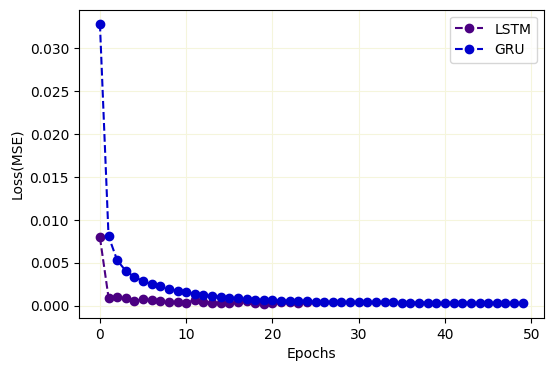

In [ ]:
loss_plot(lstm_loss.iloc[:, 1], gru_loss.iloc[:, 1])

##  **Plot 2: Average Scores Plot**



In [ ]:

#Read avg scores files
lstm_avg_scores = read_df_from_file(output_dir_path+'multiple_lstm_models_average_scores.csv')
gru_avg_scores = read_df_from_file(output_dir_path+'multiple_gru_models_average_scores.csv')


def avg_test_scores_plot(lstm_avg_scores, gru_avg_scores):

  lstm_neurons = [8, 16, 32, 64, 128]
  gru_neurons =  [8, 16, 32, 64, 128]


  fig = plt.figure(figsize = (20, 5))
  plt.subplot(131)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['rmse'], '--o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['rmse'], '--o', linewidth = 2.5, color = 'darkgreen')

  plt.xticks([0,1,2,3,4], lstm_neurons) ############ I removed an extra 6 at the end
  plt.title("(a)")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. RMSE")
  plt.legend(['LSTM', 'GRU'],  loc = 'best')
  sns.set_style("whitegrid")

  plt.subplot(132)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['mape'], '--o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['mape'], '--o', linewidth = 2.5, color = 'darkgreen')
  plt.xticks([0,1,2,3,4], lstm_neurons)
  plt.title("(b)")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. MAPE")
  plt.legend(['LSTM', 'GRU'],  loc = 'best')
  sns.set_style("whitegrid")


  plt.subplot(133)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['R'], '--o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['R'], '--o', linewidth = 2.5, color = 'darkgreen')
  plt.xticks([0,1,2,3,4], lstm_neurons)
  plt.title("(c)")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. R")
  plt.legend(['LSTM', 'GRU'],  loc = 'best')
  sns.set_style("whitegrid")

  fig.savefig(output_dir_path+"multiple_avg_scores_plots.png",dpi=600)
  plt.show()


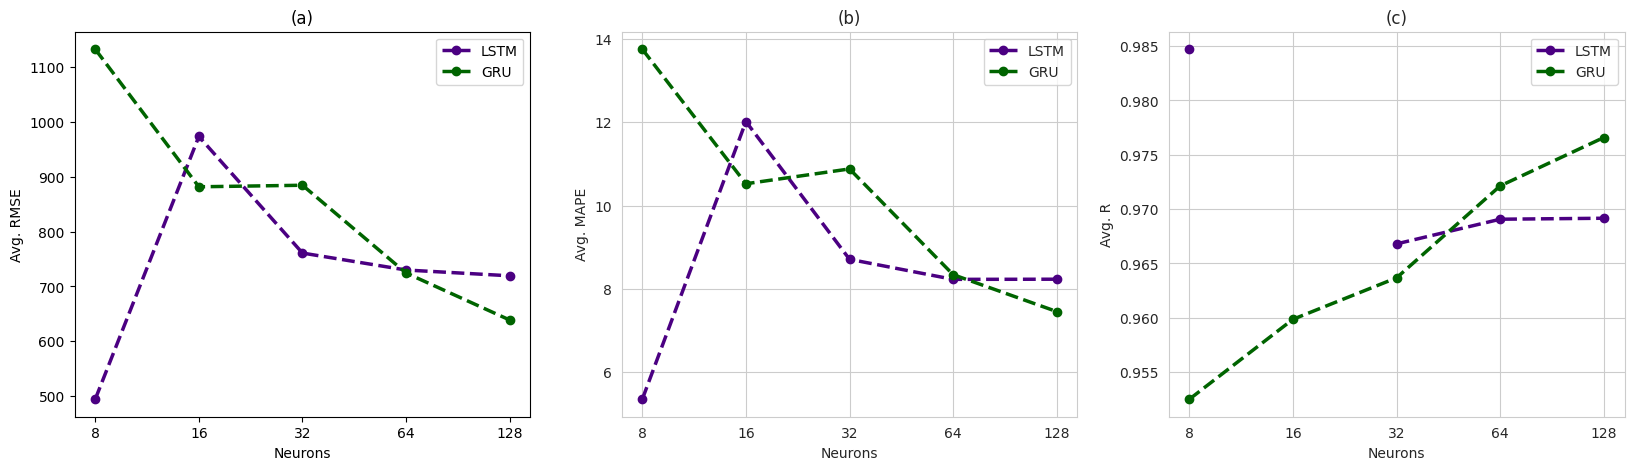

In [ ]:
avg_test_scores_plot(lstm_avg_scores, gru_avg_scores)

##  **Plot 3: True Vs Predicted Plots in Train and Test Data(By best LSTM, GRU)**

In [ ]:

#Read true vs predicted values
y_train = read_df_from_file(output_dir_path+ 'y_train.csv')
y_test =  read_df_from_file(output_dir_path+ 'y_test.csv')
lstm_train_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_train_predictions.csv')
lstm_test_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_test_predictions.csv')
gru_train_pred = read_df_from_file(output_dir_path+ 'best_gru_model_train_predictions.csv')
gru_test_pred = read_df_from_file(output_dir_path+ 'best_gru_model_test_predictions.csv')



def best_model_true_vs_prediction_plot(y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred):

  ##====== Visualizing true vs predicted plots ========#
  fig1 = plt.figure(figsize= (19,4))
  plt.subplot(121)

  plt.scatter(y_train, lstm_train_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_train), min(lstm_train_pred)), min(max(y_train), max(lstm_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(122)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_train, gru_train_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_train), min(gru_train_pred)), min(max(y_train), max(gru_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")

  fig1.savefig(output_dir_path+"true_vs_prediction_plot_train_data.png", dpi=600)

  ##====== Visualizing true vs predicted plots ========#
  fig2 = plt.figure(figsize= (19,4))
  plt.subplot(121)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, lstm_test_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_test), min(lstm_test_pred)), min(max(y_test), max(lstm_test_pred)))
  plt.plot(identity_line, identity_line, color= "red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(122)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, gru_test_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_test), min(gru_test_pred)), min(max(y_test), max(gru_test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")


  fig2.savefig(output_dir_path+ "true_vs_prediction_plot_test_data.png", dpi=600)
  plt.show()


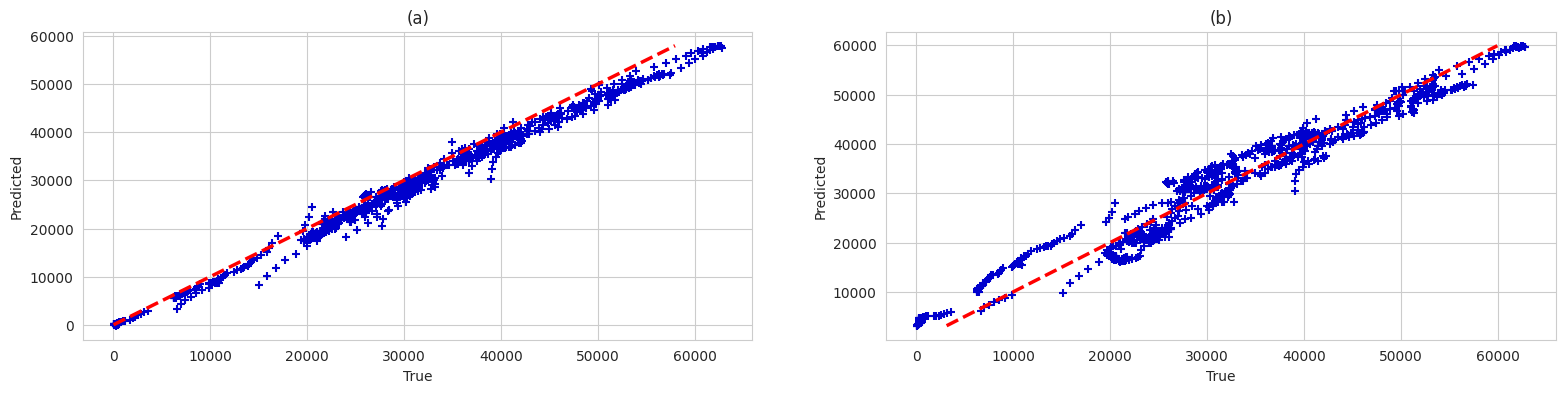

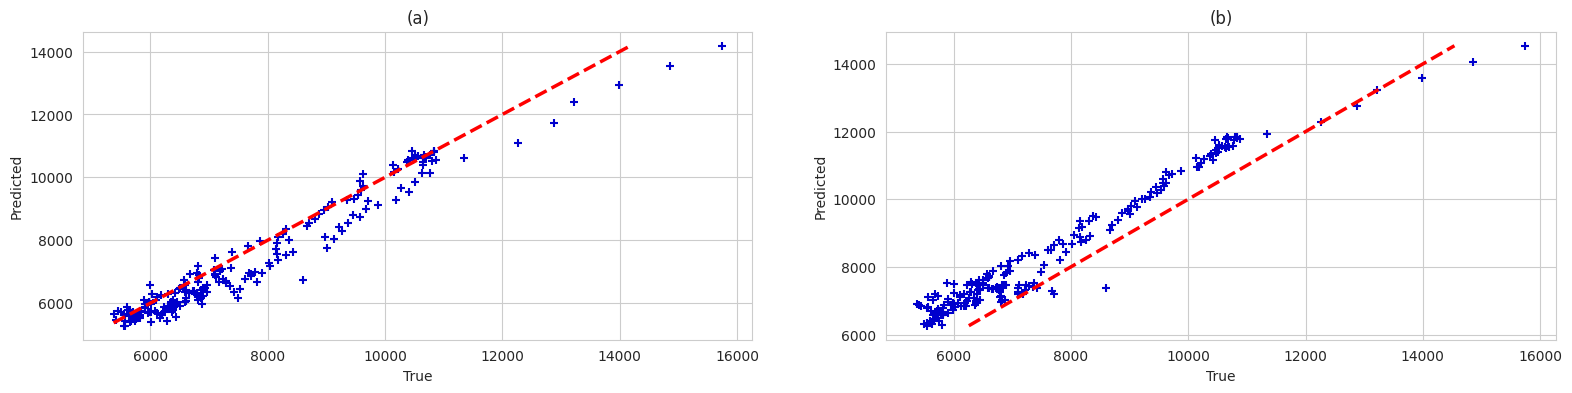

In [ ]:

#tru vs  predicted
best_model_true_vs_prediction_plot(y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1])


## **Plot 4: Prediction Plots Given by Best LSTM and GRU Models**

In [ ]:
def best_model_prediction_plot(time_step, data, y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred):

  train_predict_plot_data = np.empty_like(data.values[:,0])# extracting closing price
  train_predict_plot_data[:] = np.nan

  test_predict_plot_data = np.empty_like(data.values[:,0])
  test_predict_plot_data[:] = np.nan


  fig1 = plt.figure(figsize = (19,5))

  plt.subplot(121)

  train_predict_plot_data[time_step:len(lstm_train_pred)+ time_step] =  lstm_train_pred
  test_predict_plot_data[len(lstm_train_pred)+(time_step*2)+1:len(data.values)-1] = lstm_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc='upper right')


  plt.subplot(122)

  train_predict_plot_data[time_step:len(gru_train_pred)+ time_step] =  gru_train_pred
  test_predict_plot_data[len(gru_train_pred)+(time_step*2)+1:len(data.values)-1] = gru_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc='upper right')



  fig1.savefig(output_dir_path+"best_model_predictions_plots_full_data.png",dpi=600)



  fig2 = plt.figure(figsize = (19,5))

  plt.subplot(121)
  plt.plot(data.values[len(lstm_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(lstm_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value'], loc='upper right')

  plt.subplot(122)
  plt.plot(data.values[len(gru_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(gru_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Deaths')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value'], loc='upper right')


  fig2.savefig(output_dir_path+"best_model_predictions_plots_test_data.png",dpi=600)
  plt.show()

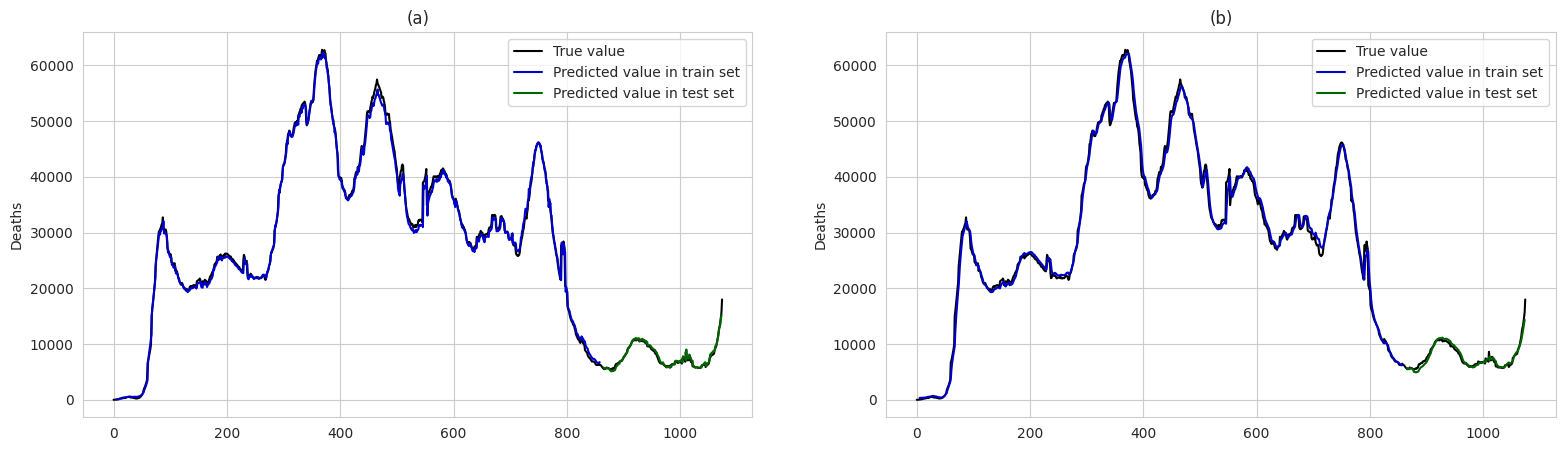

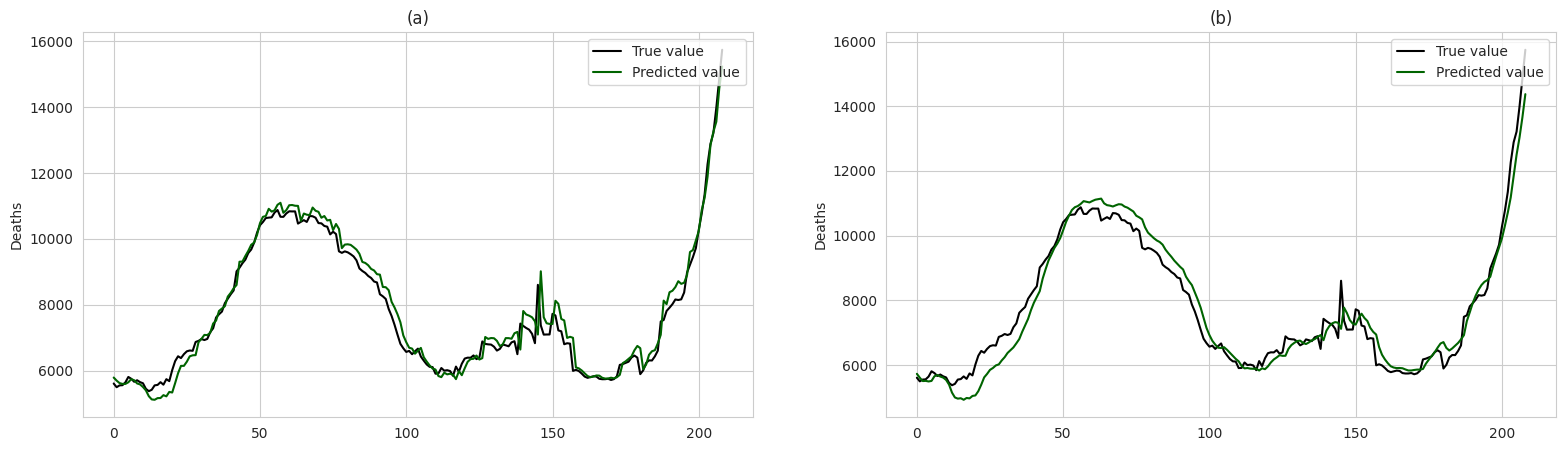

In [ ]:

best_model_prediction_plot( 5, data,
                                   y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1])


## **Plot 5: Comparative RMSE Boxplots of Best LSTM and GRU**

In [ ]:
#Read best rmse files
best_lstm_rmse = read_df_from_file(output_dir_path+ 'best_lstm_model_all_rmse.csv')
best_gru_rmse = read_df_from_file(output_dir_path+ 'best_gru_model_all_rmse.csv')

def best_model_comparative_rmse_boxplots(lstm_rmse, gru_rmse ):
  data = pd.DataFrame()
  data['LSTM'] = lstm_rmse
  data['GRU'] = gru_rmse

  fig = plt.figure(figsize = (8,4))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2], ['LSTM','GRU'])
  plt.ylabel('RMSE')
  fig.savefig(output_dir_path+"comparative_rmse_boxplots.png",dpi=600)
  plt.show()


IndexError: ignored

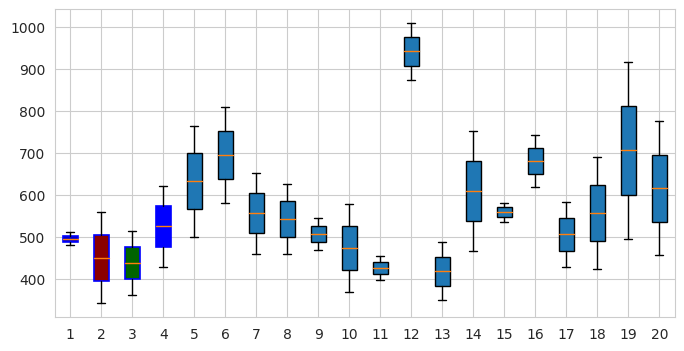

In [ ]:
best_model_comparative_rmse_boxplots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])


## **Plot 6: Statistical Analysis**

In [ ]:

import scipy

def perform_normality_test(lstm_rmse, gru_rmse):
  print("Performaing Normality Tests\n")
  print("lstm_rmse: ")
  print(scipy.stats.normaltest(lstm_rmse))
  print("gru_rmse:")
  print(scipy.stats.normaltest(gru_rmse))

def perform_pairwise_ttests(lstm_rmse, gru_rmse):

  print("\n Two-sample ttest between lstm_rmse and  gru_rmse")
  print(scipy.stats.ttest_ind(lstm_rmse, gru_rmse, equal_var = False))  # It does not require variences to be equal.

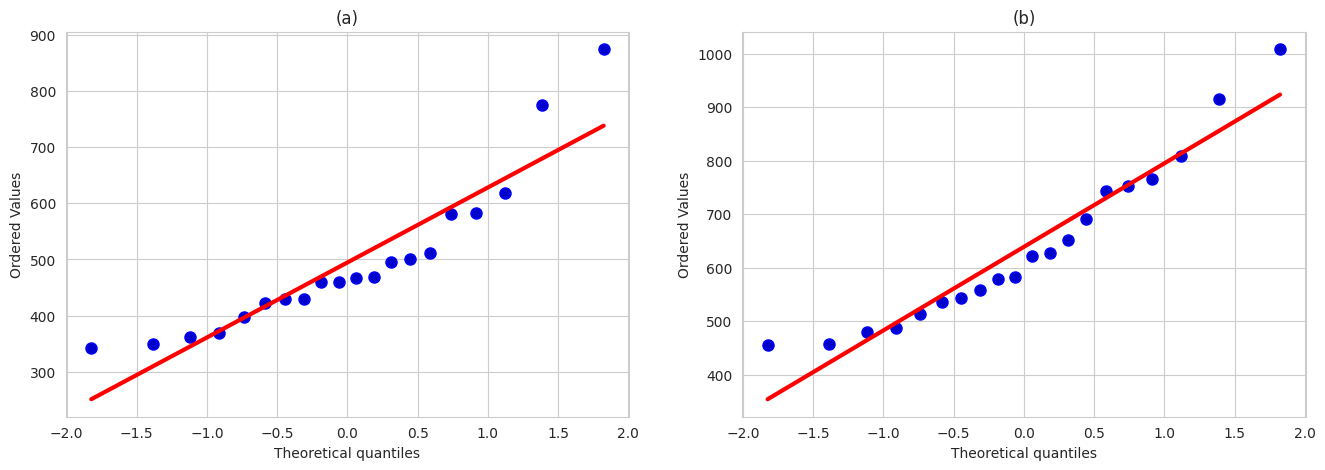

Performaing Normality Tests

lstm_rmse: 
NormaltestResult(statistic=10.987483624705483, pvalue=0.0041124274172276605)
gru_rmse:
NormaltestResult(statistic=3.485635068554623, pvalue=0.17502656190233887)

 Two-sample ttest between lstm_rmse and  gru_rmse
TtestResult(statistic=-3.129449946337364, pvalue=0.003382108899154282, df=37.52785849516695)


In [ ]:

comparative_qq_plots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])
perform_normality_test(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])
perform_pairwise_ttests(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1])